In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory="mrl/"
classes=['close','open']

In [3]:
img_size=299

In [4]:
training_data=[]
def creating_training_data():
    for c in classes:
        path=os.path.join(directory,c)
        class_num=classes.index(c)
        for img in os.listdir(path):
            try:
                img_arr=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                back_rgb=cv2.cvtColor(img_arr,cv2.COLOR_GRAY2RGB)
                new_arr=cv2.resize(back_rgb,(img_size,img_size))
                training_data.append([new_arr,class_num])
            except Exception as e:
                pass

In [5]:
creating_training_data()

In [6]:
import random

In [7]:
random.shuffle(training_data)

In [8]:
x=[]
y=[]
for feature,lable in training_data:
    x.append(feature)
    y.append(lable)
x=np.array(x).reshape(-1,img_size,img_size,3)

In [9]:
x=x/255.0

In [10]:
y=np.array(y)

In [11]:
import pickle

In [12]:
po=open("x_inc.pickle","wb")
pickle.dump(x,po)
po.close()

In [13]:
po=open("y_inc.pickle","wb")
pickle.dump(y,po)
po.close()

In [14]:
pi=open("x_inc.pickle","rb")
x=pickle.load(pi)

In [15]:
pi=open("y_inc.pickle","rb")
y=pickle.load(pi)

In [16]:
x.shape

(3663, 299, 299, 3)

In [17]:
y.shape

(3663,)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
from tensorflow.keras.applications import InceptionV3

In [20]:
weights_path='inception_v3_weights_tf_dim_ordering_tf_kernels.h5'
model = tf.keras.applications.InceptionV3(weights=weights_path)
model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,851,784 (90.99 MB)

 Trainable params: 23,817,352 (90.86 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [21]:
base_input=model.input

In [22]:
base_output=model.layers[-2].output

In [23]:
base_output= layers.Flatten()(base_output)

In [24]:
final_output= tf.keras.layers.Dense(1,activation='sigmoid')(base_output)

In [25]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [26]:
new_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,804,833 (83.18 MB)

 Trainable params: 21,770,401 (83.05 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [27]:
from tensorflow.keras.metrics import MeanSquaredError

In [28]:
import tensorflow as tf
from tensorflow.keras import backend as K

def f1_score(y_true, y_pred):
    # Convert predictions to binary (0 or 1)
    y_pred_binary = K.round(y_pred)
    
    # True positives, false positives, and false negatives
    tp = K.sum(K.cast(K.equal(y_true, 1) & K.equal(y_pred_binary, 1), dtype='float32'))
    fp = K.sum(K.cast(K.equal(y_true, 0) & K.equal(y_pred_binary, 1), dtype='float32'))
    fn = K.sum(K.cast(K.equal(y_true, 1) & K.equal(y_pred_binary, 0), dtype='float32'))
    
    # Precision and Recall
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())
    
    # F1 Score
    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1

In [29]:
new_model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy", MeanSquaredError(),f1_score])

In [30]:
history=new_model.fit(x,y,epochs=10,verbose=1)

Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1739s 15s/step - accuracy: 0.9248 - f1_score: 0.4801 - loss: 0.1841 - mean_squared_error: 0.0520
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 794s 7s/step - accuracy: 0.9818 - f1_score: 0.4820 - loss: 0.0524 - mean_squared_error: 0.0138
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 833s 7s/step - accuracy: 0.9876 - f1_score: 0.4786 - loss: 0.0399 - mean_squared_error: 0.0106
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1487s 13s/step - accuracy: 0.9869 - f1_score: 0.4863 - loss: 0.0353 - mean_squared_error: 0.0087
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 1023s 9s/step - accuracy: 0.9926 - f1_score: 0.4844 - loss: 0.0210 - mean_squared_error: 0.0055
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 972s 8s/step - accuracy: 0.9945 - f1_score: 0.4997 - loss: 0.0181 - mean_squared_error: 0.0049
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 991s 9s/step - accuracy: 0.9935 - f1_score: 0.4852 - loss: 0.0223 - mean_squared_error: 0.0055
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 939s 8s/st

In [31]:
import matplotlib.pyplot as plt

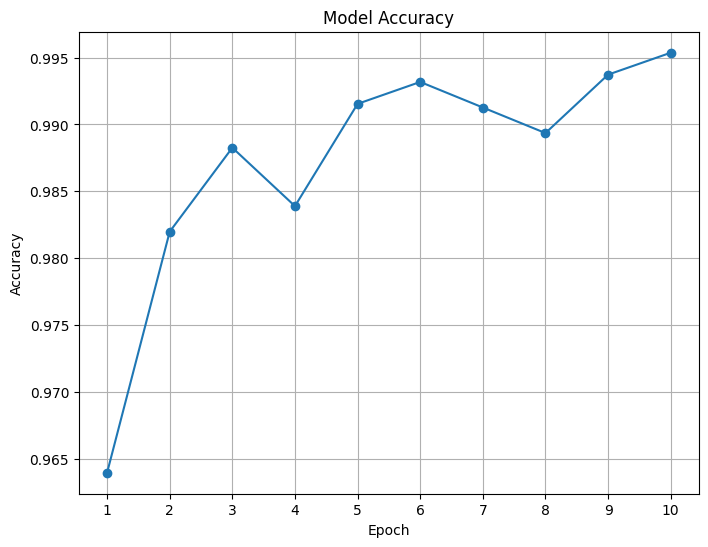

In [32]:
# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(history.history['accuracy']) + 1), history.history['accuracy'], marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Set the x-axis to have ticks every 1 unit, starting from 1
plt.xticks(range(1, len(history.history['accuracy']) + 1, 1))

plt.show()

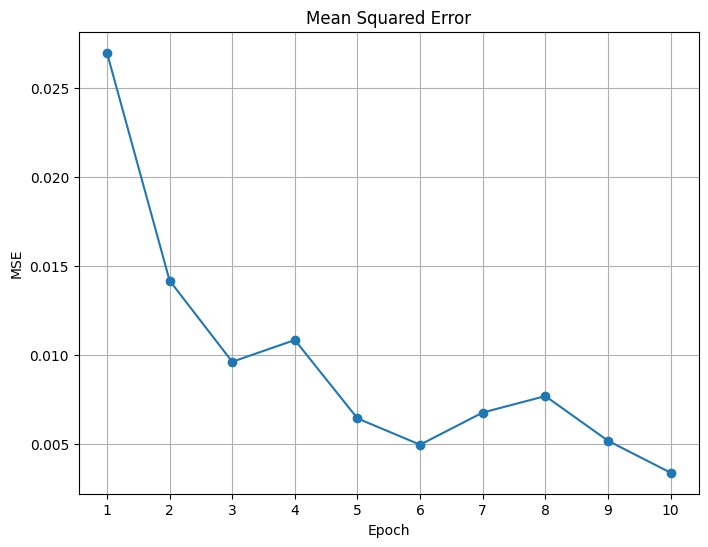

In [33]:
# Plot Mean Squared Error (MSE)
plt.figure(figsize=(8, 6))

# Adjust x-values to start from 1
plt.plot(range(1, len(history.history['mean_squared_error']) + 1), history.history['mean_squared_error'], marker='o')

plt.title('Mean Squared Error')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.grid(True)

# Set x-axis to have ticks starting from 1
plt.xticks(range(1, len(history.history['mean_squared_error']) + 1, 1))

plt.show()

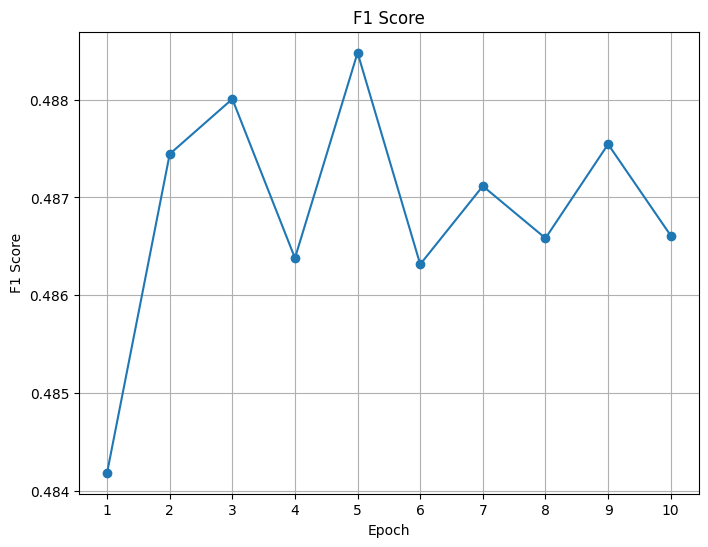

In [34]:
# Plot F1 Score
plt.figure(figsize=(8, 6))

# Adjust x-values to start from 1
plt.plot(range(1, len(history.history['f1_score']) + 1), history.history['f1_score'], marker='o')

plt.title('F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.grid(True)

# Set x-axis to have ticks starting from 1
plt.xticks(range(1, len(history.history['f1_score']) + 1, 1))

plt.show()

In [35]:
# Assuming new_model is your trained model
new_model.save('Drowsiness_Detection_MRL_Main_Inception.h5')

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
nm=tf.keras.models.load_model('Drowsiness_Detection_MRL_Main.h5')

In [37]:
test_image="mrl/Screenshot 2024-09-03 at 12.13.14 AM.png"

In [38]:
img=cv2.imread("mrl/Screenshot 2024-09-03 at 12.13.14 AM.png",cv2.IMREAD_GRAYSCALE)

In [39]:
img_size=224
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))

In [40]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

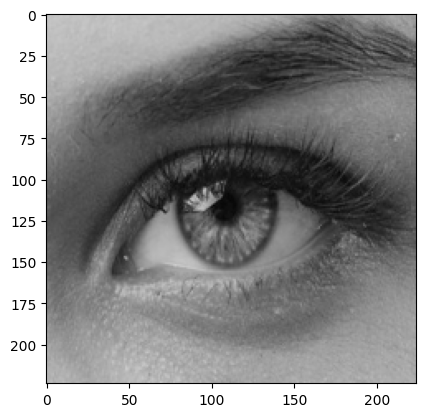

In [41]:
plt.imshow(new_array)

In [42]:
X_input=X_input/255.0

In [43]:
prediction = nm.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step


In [44]:
prediction

array([[1.]], dtype=float32)

In [45]:
img=cv2.imread("mrl/Screenshot 2024-09-03 at 12.16.45 AM.png",cv2.IMREAD_GRAYSCALE)

In [46]:
backtorgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
new_array= cv2.resize(backtorgb, (img_size,img_size))

In [47]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

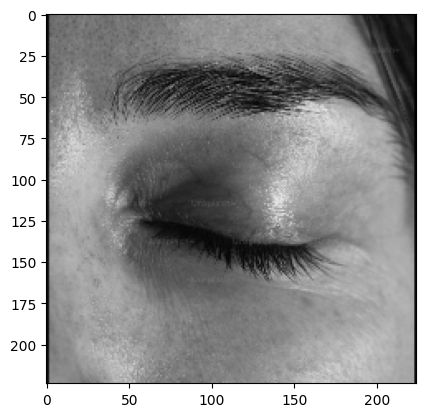

In [48]:
plt.imshow(new_array)

In [49]:
X_input=X_input/255.0

In [50]:
prediction = nm.predict(X_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [51]:
prediction

array([[0.]], dtype=float32)

In [52]:
new_model.save("Drowsiness_inception.h5")